In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
# Load dataset
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [15]:
# Separate Features and target
X = df.drop('target', axis=1)
y = df['target']

# Convert categorical (non-numeric) columns to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

In [16]:
# Standardize Features (Important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
pca = PCA(n_components=11)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(11)])
pca_df["target"] = y

In [18]:
# Quick check
print("PCA dataset (90% variance):")
print(pca_df.head())

PCA dataset (90% variance):
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.522556 -1.112803  0.956816  1.149198  0.559252  1.505052  0.071292   
1  2.590381 -0.533162  1.467315 -1.536614 -1.345335 -1.524630  1.469460   
2  3.042352 -1.327521 -0.424765 -1.567204 -0.283814  0.738182  0.378211   
3 -0.492522 -0.276720  0.801442  0.984277  0.487587  1.438634  0.385833   
4  2.187464  1.951477 -0.385539 -0.295793  2.386144  0.563839  1.022689   

        PC8       PC9      PC10      PC11  target  
0 -0.049732  0.872570 -0.417433 -0.558838       0  
1 -0.594801 -0.127561 -1.139650 -0.654299       0  
2  1.397097 -0.836844 -0.450680 -0.519250       0  
3  1.566671  0.085219 -0.425601 -0.989851       0  
4 -1.682067  0.451377 -0.534908 -0.721091       0  


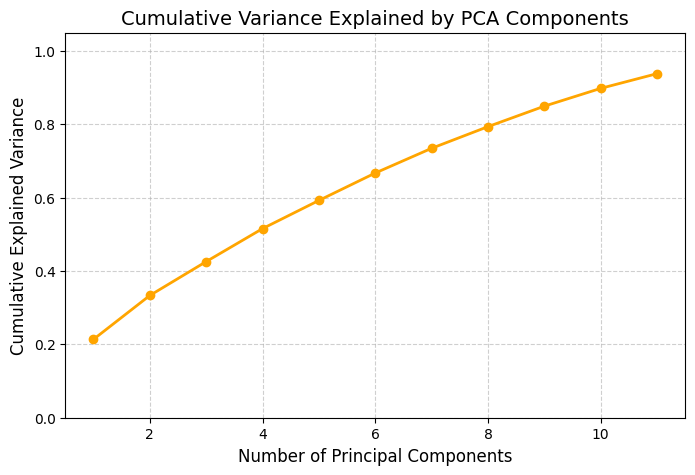

In [19]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance,
         marker='o', color="orange", linestyle='-', linewidth=2)

plt.title("Cumulative Variance Explained by PCA Components", fontsize=14)
plt.xlabel("Number of Principal Components", fontsize=12)
plt.ylabel("Cumulative Explained Variance", fontsize=12)
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()